<a href="https://colab.research.google.com/github/adindakkr/PCVK_Ganjil_2023/blob/main/3B_02_Adinda_Kurnia_Rifanti_Jobsheet_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ADINDA KURNIA RIFANTI D-IV TI 3B / 02 / 2141720100 / JOBSHEET 9

In [1]:
#Langkah 1
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
#Langkah 2
import cv2
import numpy as np
from matplotlib import pyplot as plt

(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

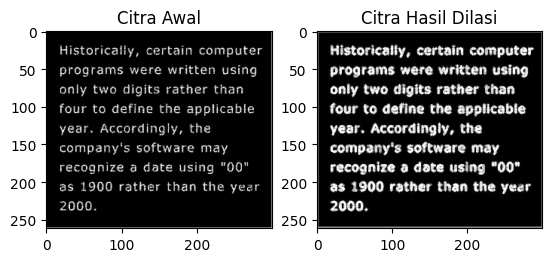

In [6]:
#Langkah 3 Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk cross 3 x 3
img = cv2.imread('/content/drive/MyDrive/PCVK/morphology.png')

# Buat kernel untuk filter cross 3x3
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0],], np.uint8)

# Lakukan dilasi menggunakan kernel cross 3x3
dilation = cv2.dilate(img, kernel, iterations=1)

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal') #fungsi subplots() kita bisa menggambar banyak plot dalam satu gambar.
plt.subplot(122),plt.imshow(dilation),plt.title('Citra Hasil Dilasi')

Structuring Element (SE) berbentuk cross 3x3:
[[0 1 0]
 [1 1 1]
 [0 1 0]]


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

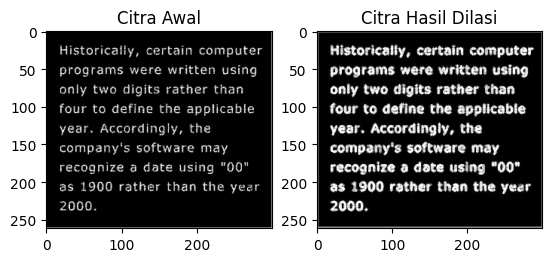

In [8]:
#Langkah 4
#Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk cross 3 x 3

# Buat kernel untuk filter cross 3x3
kernel = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
], np.uint8)

# Lakukan dilasi menggunakan library morphology
dilation = cv2.morphologyEx(img, cv2.MORPH_DILATE, kernel) #morphologyEX berfungsi untuk menghilangkan noise

# Tampilkan Structuring Element
print("Structuring Element (SE) berbentuk cross 3x3:")
print(kernel)

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilation), plt.title('Citra Hasil Dilasi')


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

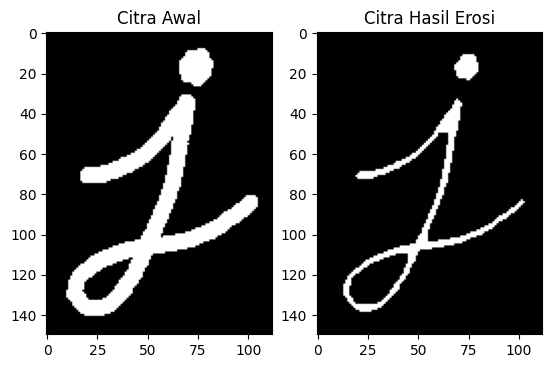

In [10]:
#Langkah 5
#Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5

# Membaca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/j.png')

# Buat kernel untuk filter square 5x5
kernel = np.ones((5,5), np.uint8)

# Lakukan erosi menggunakan kernel square 5x5
erosion = cv2.erode(img, kernel, iterations = 1)

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

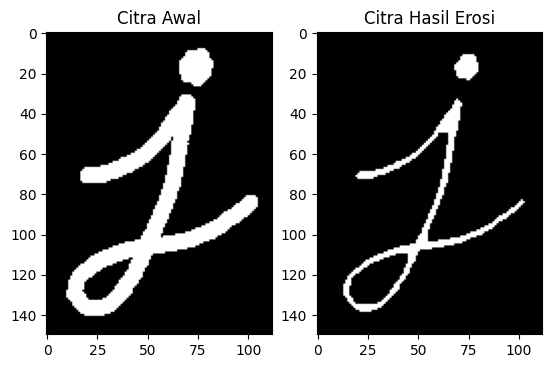

In [11]:
#Langkah 6
#Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV

# Buat kernel untuk filter square 5x5
kernel = np.ones((5,5), np.uint8)

# Lakukan erosi menggunakan library morphology
erosion = cv2.morphologyEx(img, cv2.MORPH_ERODE, kernel)

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')

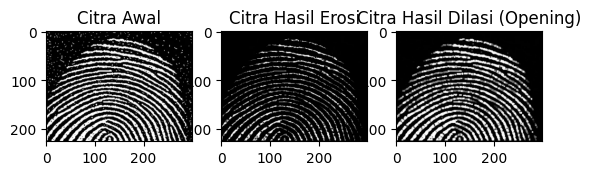

In [13]:
#Langkah 7
#Buatlah program implementasi operasi opening dengan Structuring Element berbentuk square 3 x 3 tanpa menggunakan library morphology

# Membaca image
img7 = cv2.imread('/content/drive/MyDrive/PCVK/fingerprint.png', 0) # Pastikan Anda membaca citra dalam grayscale

# Ukuran image
m, n = img7.shape

# Mendefinisikan Structuring Element berbentuk square 3x3
k = 3
SE = np.ones((k,k), dtype=np.uint8)
constant = (k-1)//2

# Erosi tanpa menggunakan fungsi inbuilt dari cv2
imgErode = np.zeros((m,n), dtype=np.uint8)
for i in range(constant, m-constant):
  for j in range(constant,n-constant):
    temp = img7[i-constant:i+constant+1, j-constant:j+constant+1]
    product = temp * SE
    imgErode[i,j] = np.min(product)

# Dilasi tanpa menggunakan fungsi inbuilt dari cv2
imgDilate = np.zeros((m,n), dtype=np.uint8)
for i in range(constant, m-constant):
  for j in range(constant,n-constant):
    temp = imgErode[i-constant:i+constant+1, j-constant:j+constant+1]
    product = temp * SE
    imgDilate[i,j] = np.max(product)

# Menampilkan hasil
plt.subplot(131), plt.imshow(img7, cmap="gray"), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(imgErode, cmap="gray"), plt.title('Citra Hasil Erosi')
plt.subplot(133), plt.imshow(imgDilate, cmap="gray"), plt.title('Citra Hasil Dilasi (Opening)')
plt.show()


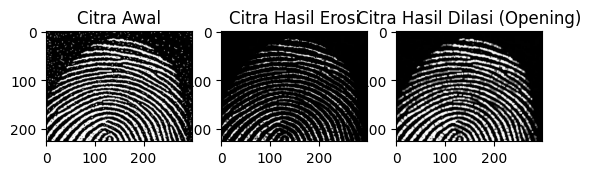

In [16]:
#Langkah 7
#Buatlah program implementasi operasi opening dengan Structuring Element berbentuk square 3 x 3 dengan menggunakan library morphology
# Membaca image
img7 = cv2.imread('/content/drive/MyDrive/PCVK/fingerprint.png', 0)  # Pastikan Anda membaca citra dalam grayscale

# Mendefinisikan Structuring Element berbentuk square 3x3
SE = np.ones((3,3), dtype=np.uint8)

# Erosi menggunakan cv2.erode
imgErode = cv2.erode(img7, SE, iterations=1)

# Dilasi menggunakan cv2.dilate
imgDilate = cv2.dilate(imgErode, SE, iterations=1)

# melakukan operasi opening langsung dengan cv2.morphologyEx
imgOpening = cv2.morphologyEx(img7, cv2.MORPH_OPEN, SE)

# Menampilkan hasil
plt.subplot(131), plt.imshow(img7, cmap="gray"), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(imgErode, cmap="gray"), plt.title('Citra Hasil Erosi')
plt.subplot(133), plt.imshow(imgDilate, cmap="gray"), plt.title('Citra Hasil Dilasi (Opening)')
# Tambahkan ini jika ingin menampilkan hasil dari cv2.morphologyEx
# plt.subplot(134), plt.imshow(imgOpening, cmap="gray"), plt.title('Citra Hasil Opening dengan morphologyEx')
plt.show()


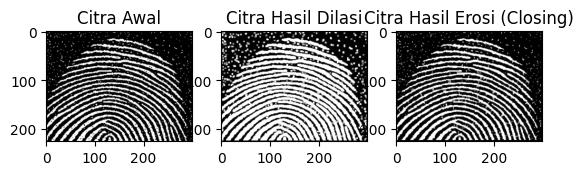

In [18]:
#Langkah 8
#Buatlah program implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3 tanpa menggunakan library morphology dari openCV

# Membaca image
img8 = cv2.imread('/content/drive/MyDrive/PCVK/fingerprint.png', 0)

# Ukuran image
p, q = img8.shape

# Mendefinisikan Structuring Element berbentuk square 3x3
SE = np.ones((3,3), dtype=np.uint8)
constant = (3-1)//2

# Dilasi tanpa menggunakan fungsi inbuilt dari cv2
imgDilate = np.zeros((p,q), dtype=np.uint8)
for i in range(constant, p-constant):
  for j in range(constant,q-constant):
    temp = img8[i-constant:i+constant+1, j-constant:j+constant+1]
    product = temp * SE
    imgDilate[i,j] = np.max(product)

# Erosi tanpa menggunakan fungsi inbuilt dari cv2
imgErode = np.zeros((p,q), dtype=np.uint8)
for i in range(constant, p-constant):
  for j in range(constant,q-constant):
    temp = imgDilate[i-constant:i+constant+1, j-constant:j+constant+1]
    product = temp * SE
    imgErode[i,j] = np.min(product)

# Menampilkan hasil
plt.subplot(131), plt.imshow(img8, cmap="gray"), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(imgDilate, cmap="gray"), plt.title('Citra Hasil Dilasi')
plt.subplot(133), plt.imshow(imgErode, cmap="gray"), plt.title('Citra Hasil Erosi (Closing)')
plt.show()


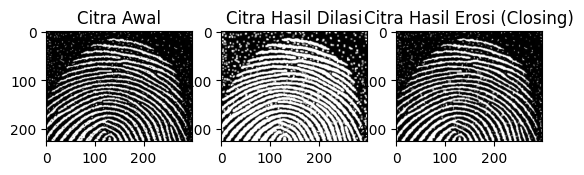

In [19]:
#Langkah 8
#Buatlah program implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3 dengan menggunakan library morphology dari openCV

# Membaca image
img8 = cv2.imread('/content/drive/MyDrive/PCVK/fingerprint.png', 0)  # Pastikan Anda membaca citra dalam grayscale

# Mendefinisikan Structuring Element berbentuk square 3x3
SE = np.ones((3,3), dtype=np.uint8)

# Melakukan operasi dilasi menggunakan cv2.dilate
imgDilate = cv2.dilate(img8, SE, iterations=1)

# Melakukan operasi erosi menggunakan cv2.erode
imgErode = cv2.erode(imgDilate, SE, iterations=1)

# melakukan operasi closing langsung dengan cv2.morphologyEx
imgClosing = cv2.morphologyEx(img8, cv2.MORPH_CLOSE, SE)

# Menampilkan hasil
plt.subplot(131), plt.imshow(img8, cmap="gray"), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(imgDilate, cmap="gray"), plt.title('Citra Hasil Dilasi')
plt.subplot(133), plt.imshow(imgErode, cmap="gray"), plt.title('Citra Hasil Erosi (Closing)')
# Tambahkan ini jika ingin menampilkan hasil dari cv2.morphologyEx
# plt.subplot(134), plt.imshow(imgClosing, cmap="gray"), plt.title('Citra Hasil Closing dengan morphologyEx')
plt.show()


SED = Cross 3


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

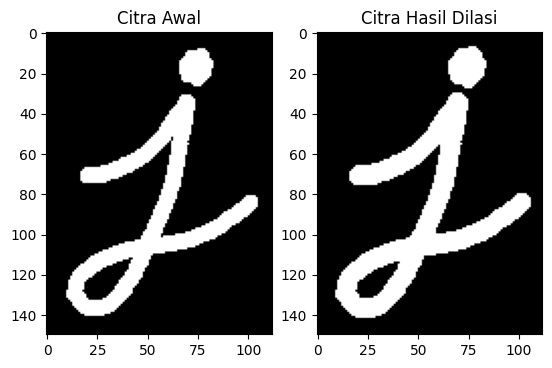

In [20]:
#Langkah 9
# Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3
# Membaca image
img8 = cv2.imread('/content/drive/MyDrive/PCVK/j.png')

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
dilation = cv2.dilate(img, kernel, iterations = 1)

print("SED = Cross 3")

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.subplot(122),plt.imshow(dilation),plt.title('Citra Hasil Dilasi')

SED = Cross 5


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

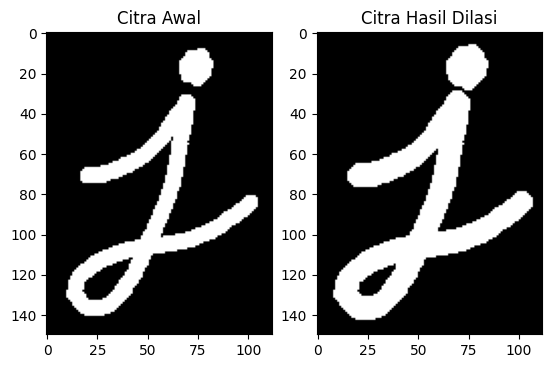

In [21]:
#Langkah 9
# Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Cross 5 x 5
# Membaca image
img8 = cv2.imread('/content/drive/MyDrive/PCVK/j.png')

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
dilation = cv2.dilate(img, kernel, iterations = 1)

print("SED = Cross 5")

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.subplot(122),plt.imshow(dilation),plt.title('Citra Hasil Dilasi')

SED = Circle 3


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

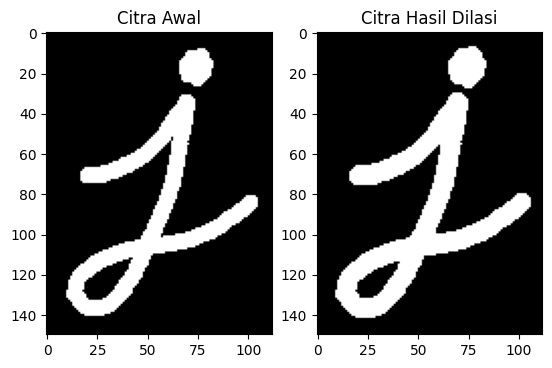

In [22]:
#Langkah 10
# Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
dilation = cv2.dilate(img, kernel, iterations = 1)

print("SED = Circle 3")

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.subplot(122),plt.imshow(dilation),plt.title('Citra Hasil Dilasi')

SED = Circle 5


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

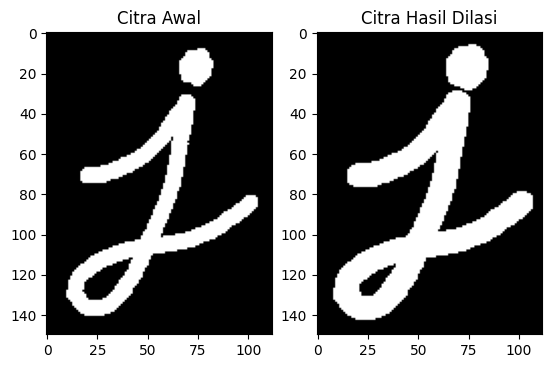

In [23]:
#Langkah 10
# Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Circular 5 x 5
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
dilation = cv2.dilate(img, kernel, iterations = 1)

print("SED = Circle 5")

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.subplot(122),plt.imshow(dilation),plt.title('Citra Hasil Dilasi')

SE = Rectangle 3x5


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

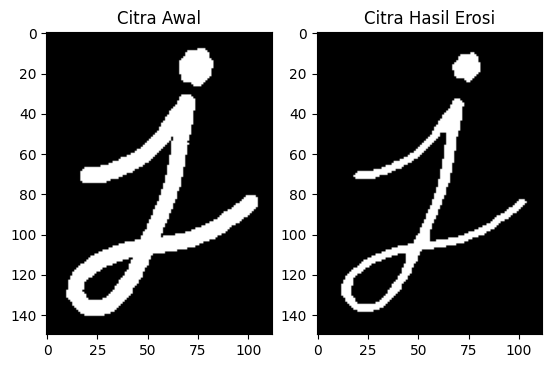

In [24]:
#Langkah 11
# Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Rectangle 3 x 5
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,5))
erosion = cv2.erode(img, kernel, iterations = 1)

print("SE = Rectangle 3x5")

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')

SE = Rectangle 5x7


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

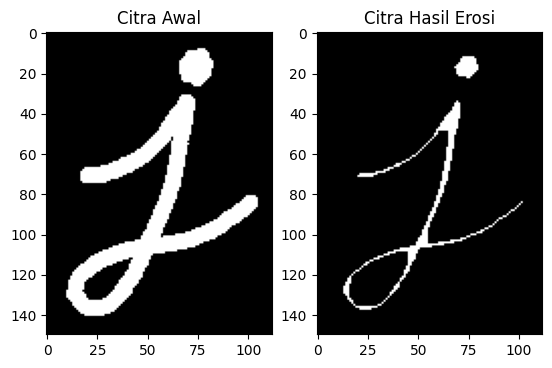

In [25]:
#Langkah 11
# Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Rectangle 5 x 7
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,7))
erosion = cv2.erode(img, kernel, iterations = 1)

print("SE = Rectangle 5x7")

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')

SE = Line Vertikal 3


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

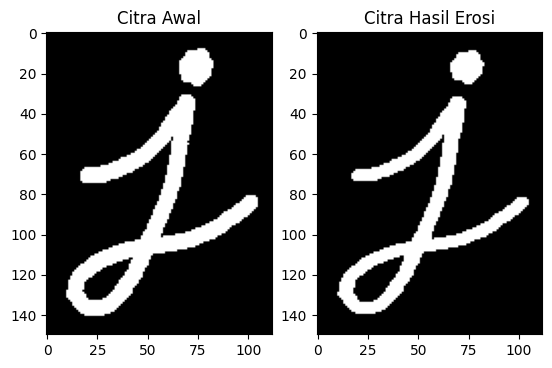

In [26]:
#Langkah 12
#Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Line Vertikal 3
kernel = np.ones((3,1),np.uint8)
erosion = cv2.morphologyEx(img, cv2.MORPH_ERODE, kernel)

print("SE = Line Vertikal 3")

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')


SE = Line Vertikal 5


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

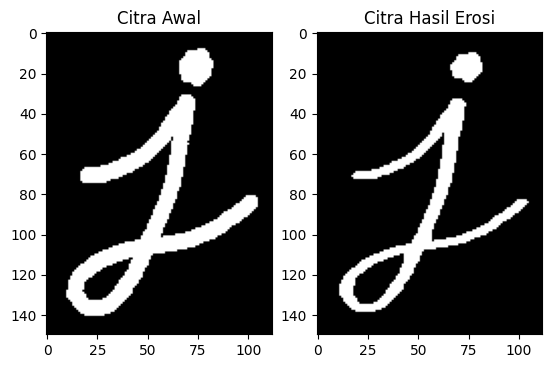

In [27]:
#Langkah 12
#Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Line Vertikal 5
kernel = np.ones((5,1),np.uint8)
erosion = cv2.morphologyEx(img, cv2.MORPH_ERODE, kernel)

print("SE = Line Vertikal 5")

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')
